In [2]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# dataset directory
ds_dir = os.path.join(os.getcwd(), 'datasets')

# data

In [6]:
# load data in to pandas dataframe
rand_path = os.path.join(ds_dir, 'random')

trn_pd = pd.read_csv(os.path.join(rand_path, 'train.csv'))
test_pd = pd.read_csv(os.path.join(rand_path, 'test.csv'))

print(trn_pd.head(),end='\n\n')
print(test_pd.head())

#print(trn_pd.iloc[0],end='\n')
# could also display summary statistics 

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


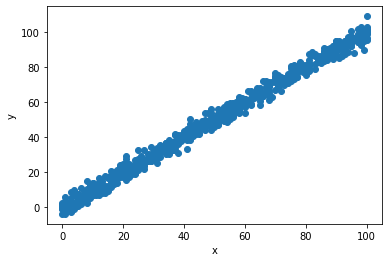

In [7]:
# view training data
plt.scatter(trn_pd.x, trn_pd.y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# data preprocessing

In [9]:
# convert to numpy
trn_set = trn_pd.to_numpy()
print(trn_set[0:5], end='\n\n')

test = test_pd.to_numpy()
print(test[0:5])

# remove any nans 
nans = np.argwhere(np.isnan(trn_set))

for nan_loc in nans:
    trn_set = np.delete(trn_set, (nan_loc[0]), axis=0)

print(trn_set.shape)

[[24.         21.54945196]
 [50.         47.46446305]
 [15.         17.21865634]
 [38.         36.58639803]
 [87.         87.28898389]]

[[77.         79.77515201]
 [21.         23.17727887]
 [22.         25.60926156]
 [20.         17.85738813]
 [36.         41.84986439]]
(699, 2)


In [11]:
# split trn into trn and validation sets
# data is randomly ordered so no need to shuffle rows it
trn_m = trn_set.shape[0]
trn_prop = 0.8
trn_size = round(trn_prop * trn_m)
trn = trn_set[0:trn_size, :]
val = trn_set[trn_size:, :]

print('trn: {}\t\tval: {}\t\ttest: {}'.format(trn.shape, val.shape, test.shape, sep='\n'))

trn: (559, 2)		val: (140, 2)		test: (300, 2)


In [12]:
# separate into X and Y

trnX = trn[:,0:-1]
trnY = trn[:,-1]
valX = val[:,0:-1]
valY = val[:,-1]
testX = test[:,0:-1]
testY = test[:,-1]

print(trnX.shape, trnY.shape, valX.shape, valY.shape, testX.shape, testY.shape, sep='\n')

(559, 1)
(559,)
(140, 1)
(140,)
(300, 1)
(300,)


In [13]:
# feature scale and mean normalise features before input into model
def fs_mn(X):        
    newX = (X - X.mean(axis=0)) / X.std(axis=0)
    return newX

In [14]:
trnX = fs_mn(trnX)
valX = fs_mn(valX)
#testX = fs_mn(testX)
print(trnX.shape, valX.shape)
print(trnX.mean(axis=0), trnX.std(axis=0))

(559, 1) (140, 1)
[-1.20754132e-16] [1.]


# class definition

In [15]:
class linReg():
    
    def __init__(self, X, Y):
 
        #X -> m x n matrix, normalised 
        #Y -> m x 1 vector
        self.m = X.shape[0]
        self.n = X.shape[1]
        self.W = np.random.rand(self.n, 1)
        self.b = np.random.random()
        self.trn_cost_hx = []
        self.val_cost_hx = []
      

    def predict(self, X):
        #print('-- in predict --')
        
        #print('\tX.shape: {}'.format(X.shape))
        #print('\tW.shape: {}'.format(self.W.shape))
        #print('\tb.shape: {}'.format(self.b.shape))
        
        yhat = np.matmul(X,self.W) + self.b
        #print('\tyhat.shape: {}'.format(yhat.shape))
        
        return yhat
        
    
    def mse(self, yhat, Y):
        #print('-- in mse --')
        # make Y a column vector if not already 
        if Y.ndim == 1:
            Y = Y.reshape(self.m, -1)
        
        #print('\tyhat.shape: {}'.format(yhat.shape))
        #print('\tY.shape: {}'.format(Y.shape))
        
        sq_diff = (yhat - Y) ** 2
        
        #print('\tsq_diff.shape: {}'.format(sq_diff.shape))
        
        err = (0.5/self.m) * sq_diff.sum() 

        self.trn_cost_hx.append(err)
        #print('\terror: {}'.format(err))
        
        return err

    
    def grad_descent(self, X, Y, lr, yhat):
        #print('-- in grad_descent --')
        
        # make Y a column vector if not already 
        if Y.ndim == 1:
            Y = Y.reshape(self.m, -1)
        
        dW = (X * (yhat - Y).reshape(self.m, -1) ).sum()
        #print('\tdW.shape: {}'.format(dW.shape))
        
        self.W = self.W - (lr * 1/self.m) * dW
        #print('\tW.shape: {}'.format(self.W.shape))
        
        self.b = self.b - (lr * 1/self.m) * (yhat - Y).sum()
        #print('\tW.shape: {}'.format(self.W.shape))
        #print('\tb.shape: {}'.format(self.b.shape))
        
        return 
        
    
    def val_mse(self, valX, valY):
        #print('-- in val_mse --')
        
        #print('\tW.shape: {}'.format(self.W.shape))
        #print('\tvalX.shape: {}'.format(valX.shape))
        #print('\tb: {}'.format(self.b))
        
        # predictions
        val_yhat = self.predict(valX)
        
        # mean squared error
        val_m = valY.shape[0]
        if valY.ndim == 1:
            valY = valY.reshape(val_m, -1)
        
        sq_diff = (val_yhat - valY) ** 2
        err = (0.5/val_m) * sq_diff.sum() 

        self.val_cost_hx.append(err)
    
        return 
    

    def train(self, epochs, lr, trnX, trnY, valX, valY, dim1=False):
        
        start_time = time.time()
        
        for i in range(epochs):
            yhat = self.predict(trnX)
            err = self.mse(yhat, trnY)
            self.val_mse(valX, valY)
            self.grad_descent(trnX, trnY, lr, yhat)
            
            # visualise fit on validation set - only when there is one feature
            if i%5==0 and dim1:
                plt.plot(valX, model.predict(valX), color='red')
                plt.scatter(valX, valY)
                plt.xlabel("x")
                plt.ylabel("y")
                plt.show()

        print('-- training time: {} sec --'.format(time.time() - start_time))        


# use the class

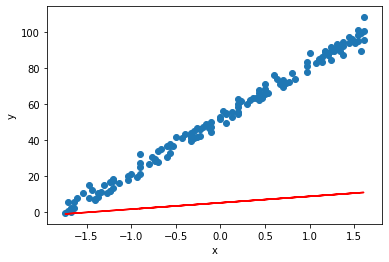

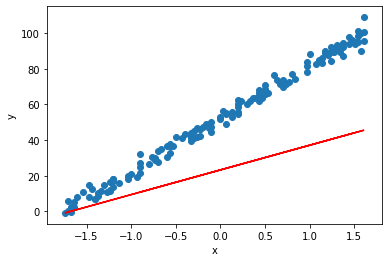

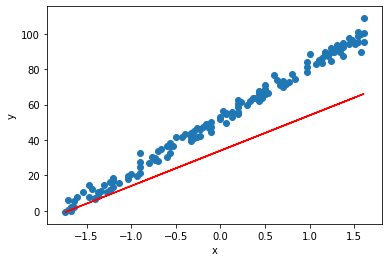

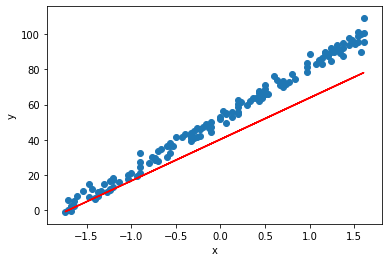

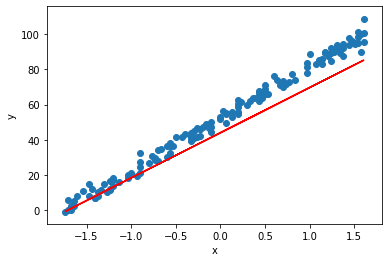

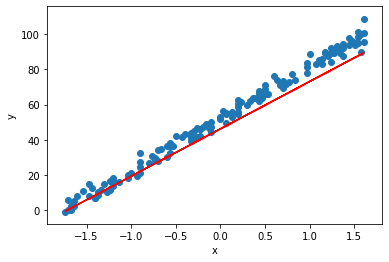

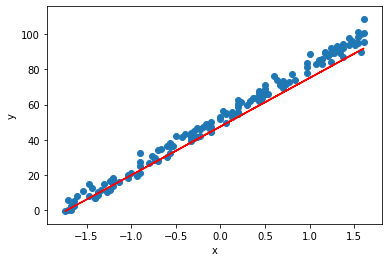

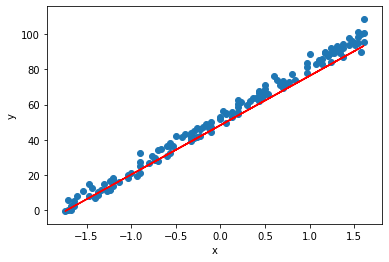

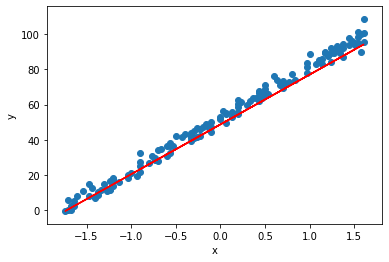

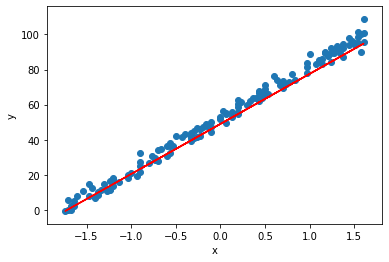

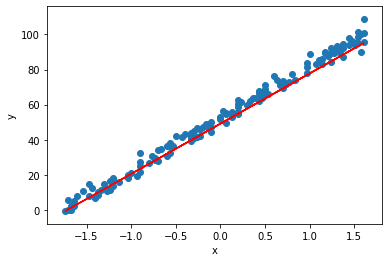

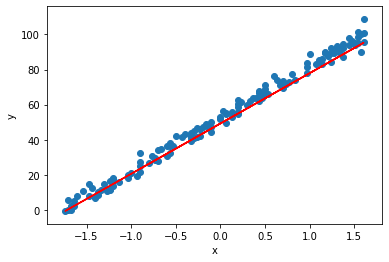

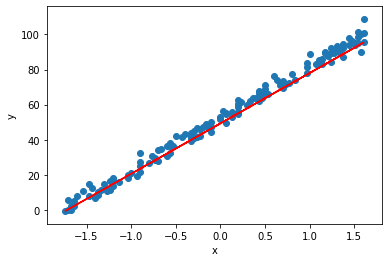

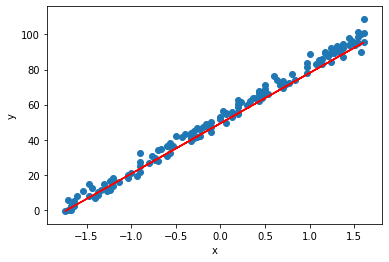

-- training time: 3.900710105895996 sec --


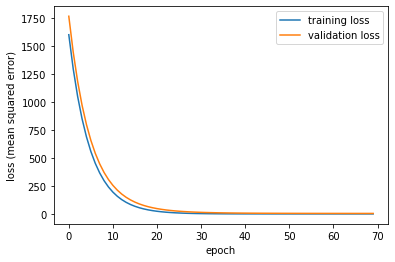

3.909914964138437 8.229783749154878


In [16]:
model = linReg(trnX, trnY)

model.train(70, 0.1, trnX, trnY, valX, valY, dim1=True)

plt.plot(model.trn_cost_hx, label='training loss')
plt.plot(model.val_cost_hx, label='validation loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (mean squared error)')
plt.show()
print(model.trn_cost_hx[-1], model.val_cost_hx[-1])

# test set

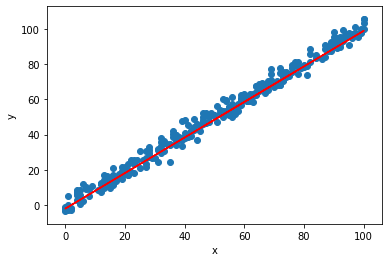

In [18]:
# on test set
testX_norm = fs_mn(testX)
testYpreds = model.predict(testX_norm) # predictions on test set

plt.plot(testX, testYpreds, color='r')
plt.scatter(testX, testY)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# sandbox

In [ ]:
arr = np.array([[1, 2],
                [1, 2],
                [2, 4],
                [2, 4],
                [4, 8],
                [4, 8]])
print(
    arr.mean(axis=0),
    arr.std(axis=0),
    sep='\n'
)

In [ ]:
arr * np.array([2,2,2,2,2,2]).reshape(6, -1)

In [ ]:
np.array(range(10)).reshape(10,-1).sum()